#### 1. Please load the given “Dengue_y2008_2018.csv”. The datasets contain the responses of dengue fever infections data each month from 2008 to 2018 in Bangladesh. “DENGUE” is the target variable, and the other variables are predictors. Consider the following questions.(70%)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
Dengue_y2008 = pd.read_csv("Dengue_y2008_2018.csv")

# Display the first few rows of the dataset
print(Dengue_y2008.head())

   YEAR  MONTH        MIN        MAX   HUMIDITY  RAINFALL  DENGUE
0  2010      1  11.341161  24.549217  78.661751  0.000922     0.0
1  2009     12  13.732589  26.410247  79.276498  0.000922     0.0
2  2014     12  14.105000  25.980369  82.176959  0.001843    11.0
3  2008     12  15.921232  26.389862  83.570507  0.001843     0.0
4  2014      1  12.127849  24.829401  79.981567  0.003687    15.0


#### 1.1. [5 pts] Assume that we have received the new data for the year 2019 (Dengue_y2019_.csv). 

Please load the new dataset and merge it with the data from
other years (Dengue_y2008_2018.csv).

In [2]:
import pandas as pd

# Load the new dataset for the year 2018
Dengue_y2008 = pd.read_csv("Dengue_y2008_2018.csv")

# Load the new dataset for the year 2019
Dengue_y2019 = pd.read_csv("Dengue_y2019_.csv")

# Merge the datasets on common columns 
Dengue_merged = pd.concat([Dengue_y2008, Dengue_y2019])

# Display the first few rows of the merged dataset
print(Dengue_merged.head())

# save the merged dataset to a new CSV file
Dengue_merged.to_csv("Dengue_merged_Data.csv", index=False)


   YEAR  MONTH        MIN        MAX   HUMIDITY  RAINFALL  DENGUE
0  2010      1  11.341161  24.549217  78.661751  0.000922     0.0
1  2009     12  13.732589  26.410247  79.276498  0.000922     0.0
2  2014     12  14.105000  25.980369  82.176959  0.001843    11.0
3  2008     12  15.921232  26.389862  83.570507  0.001843     0.0
4  2014      1  12.127849  24.829401  79.981567  0.003687    15.0


#### 1.2. [5 pts] Check the dataset for any missing values (NAs). 
If there are any observations containing NAs, display the entire observation and then remove it.

In [5]:
import pandas as pd

# Load the merged dataset
Dengue_merged = pd.read_csv("Dengue_merged_Data.csv")

# Check for missing values
missing_values = Dengue_merged[Dengue_merged.isnull().any(axis=1)]

# Display observations with missing values
print("Observations with Missing Values:")
print(missing_values)

# Remove observations with missing values
df_cleaned = Dengue_merged.dropna()

# Display the first few rows of the cleaned dataset
print("\nCleaned Dataset:")
print(df_cleaned.head())


Observations with Missing Values:
    YEAR  MONTH        MIN  MAX   HUMIDITY  RAINFALL  DENGUE
40  2009     12  18.888888  NaN  78.888888  0.888888     NaN

Cleaned Dataset:
   YEAR  MONTH        MIN        MAX   HUMIDITY  RAINFALL  DENGUE
0  2010      1  11.341161  24.549217  78.661751  0.000922     0.0
1  2009     12  13.732589  26.410247  79.276498  0.000922     0.0
2  2014     12  14.105000  25.980369  82.176959  0.001843    11.0
3  2008     12  15.921232  26.389862  83.570507  0.001843     0.0
4  2014      1  12.127849  24.829401  79.981567  0.003687    15.0


#### 1.3. [5 pts] Are there any duplicate observations? 
If any duplicates exist, keep only one instance of the duplicated observation and remove the rest.

In [6]:
# Load the merged dataset
Dengue_merged = pd.read_csv("Dengue_merged_Data.csv")

# Check for duplicate observations
duplicates = Dengue_merged[Dengue_merged.duplicated()]

# Display duplicate observations
print("Duplicate Observations:")
print(duplicates)

# Remove duplicate observations and keep only one instance
df_no_duplicates = Dengue_merged.drop_duplicates()

# Display the first few rows of the dataset without duplicates
print("\nDataset without Duplicates:")
print(df_no_duplicates.head())


Duplicate Observations:
    YEAR  MONTH        MIN        MAX   HUMIDITY  RAINFALL  DENGUE
37  2008      2  13.658286  26.383448  72.602956  0.687685     0.0
48  2008      1  12.993929  25.059539  78.824885  1.286636     0.0

Dataset without Duplicates:
   YEAR  MONTH        MIN        MAX   HUMIDITY  RAINFALL  DENGUE
0  2010      1  11.341161  24.549217  78.661751  0.000922     0.0
1  2009     12  13.732589  26.410247  79.276498  0.000922     0.0
2  2014     12  14.105000  25.980369  82.176959  0.001843    11.0
3  2008     12  15.921232  26.389862  83.570507  0.001843     0.0
4  2014      1  12.127849  24.829401  79.981567  0.003687    15.0


#### 1.4. [10 pts] Create a new column called "SEASON", 
where Dec.-Feb. is winter, Mar.-May is spring, Jun.-Aug. is summer, and Sep.-Nov. is fall. 
Then, group the data by season to sum the “DENGUE” values.

In [16]:

# Load the dataset without duplicates
Dengue_merged = pd.read_csv("Dengue_merged_Data.csv")

# Create a new column "SEASON" based on the month
Dengue_merged['SEASON'] = pd.cut(Dengue_merged['MONTH'], bins=[0, 2, 5, 8, 11, 12], labels=['Winter', 'Spring', 'Summer', 'Fall', 'Winter'], ordered=False)


print(Dengue_merged.head())

# Group the data by season and sum the "DENGUE" values
Dengue_sum = Dengue_merged.groupby('SEASON')['DENGUE'].sum()

# Display the seasonal dengue sum
print("Dengue Sum:")
print(Dengue_sum)


   YEAR  MONTH        MIN        MAX   HUMIDITY  RAINFALL  DENGUE  SEASON
0  2010      1  11.341161  24.549217  78.661751  0.000922     0.0  Winter
1  2009     12  13.732589  26.410247  79.276498  0.000922     0.0  Winter
2  2014     12  14.105000  25.980369  82.176959  0.001843    11.0  Winter
3  2008     12  15.921232  26.389862  83.570507  0.001843     0.0  Winter
4  2014      1  12.127849  24.829401  79.981567  0.003687    15.0  Winter
Dengue Sum:
SEASON
Fall      16298.0
Spring      515.0
Summer    10537.0
Winter     1002.0
Name: DENGUE, dtype: float64


/var/folders/bd/hbhq4wsn28d9hg6673m4blg00000gn/T/ipykernel_40527/2322517418.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Dengue_sum = Dengue_merged.groupby('SEASON')['DENGUE'].sum()


#### 1.5. [5 pts] Convert columns “YEAR”, “MONTH” and “SEASON” to factor in R and categorical in Python.

In [24]:
# Convert "YEAR" and "MONTH" to categorical
Dengue_merged['YEAR'] = pd.Categorical(Dengue_merged['YEAR'])
Dengue_merged['MONTH'] = pd.Categorical(Dengue_merged['MONTH'])

# Convert "SEASON" to categorical
Dengue_merged['SEASON'] = pd.Categorical(Dengue_merged['SEASON'])

# Viewing the data types of each column in the DataFrame
print(Dengue_merged.info())

print(Dengue_merged.dtypes)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   YEAR      137 non-null    category
 1   MONTH     137 non-null    category
 2   MIN       137 non-null    float64 
 3   MAX       136 non-null    float64 
 4   HUMIDITY  137 non-null    float64 
 5   RAINFALL  137 non-null    float64 
 6   DENGUE    136 non-null    float64 
 7   SEASON    137 non-null    category
dtypes: category(3), float64(5)
memory usage: 6.9 KB
None
YEAR        category
MONTH       category
MIN          float64
MAX          float64
HUMIDITY     float64
RAINFALL     float64
DENGUE       float64
SEASON      category
dtype: object


#### 1.6. [10 pts] For continuous variables, create density plots to understand the distribution of the data.

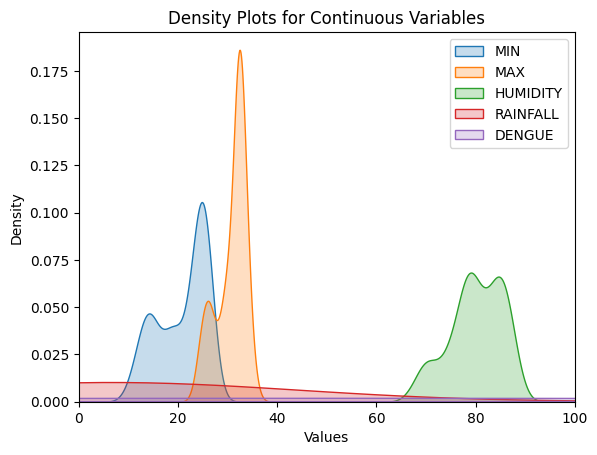

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset without duplicates
Dengue_merged = pd.read_csv("Dengue_merged_Data.csv")

# Create density plots for continuous variables
sns.kdeplot(Dengue_merged['MIN'], fill=True, label='MIN')
sns.kdeplot(Dengue_merged['MAX'], fill=True, label='MAX')
sns.kdeplot(Dengue_merged['HUMIDITY'], fill=True, label='HUMIDITY')
sns.kdeplot(Dengue_merged['RAINFALL'], fill=True, label='RAINFALL')
sns.kdeplot(Dengue_merged['DENGUE'], fill=True, label='DENGUE')

# Set plot labels and title
plt.title('Density Plots for Continuous Variables')
plt.xlim(0,100)
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show()


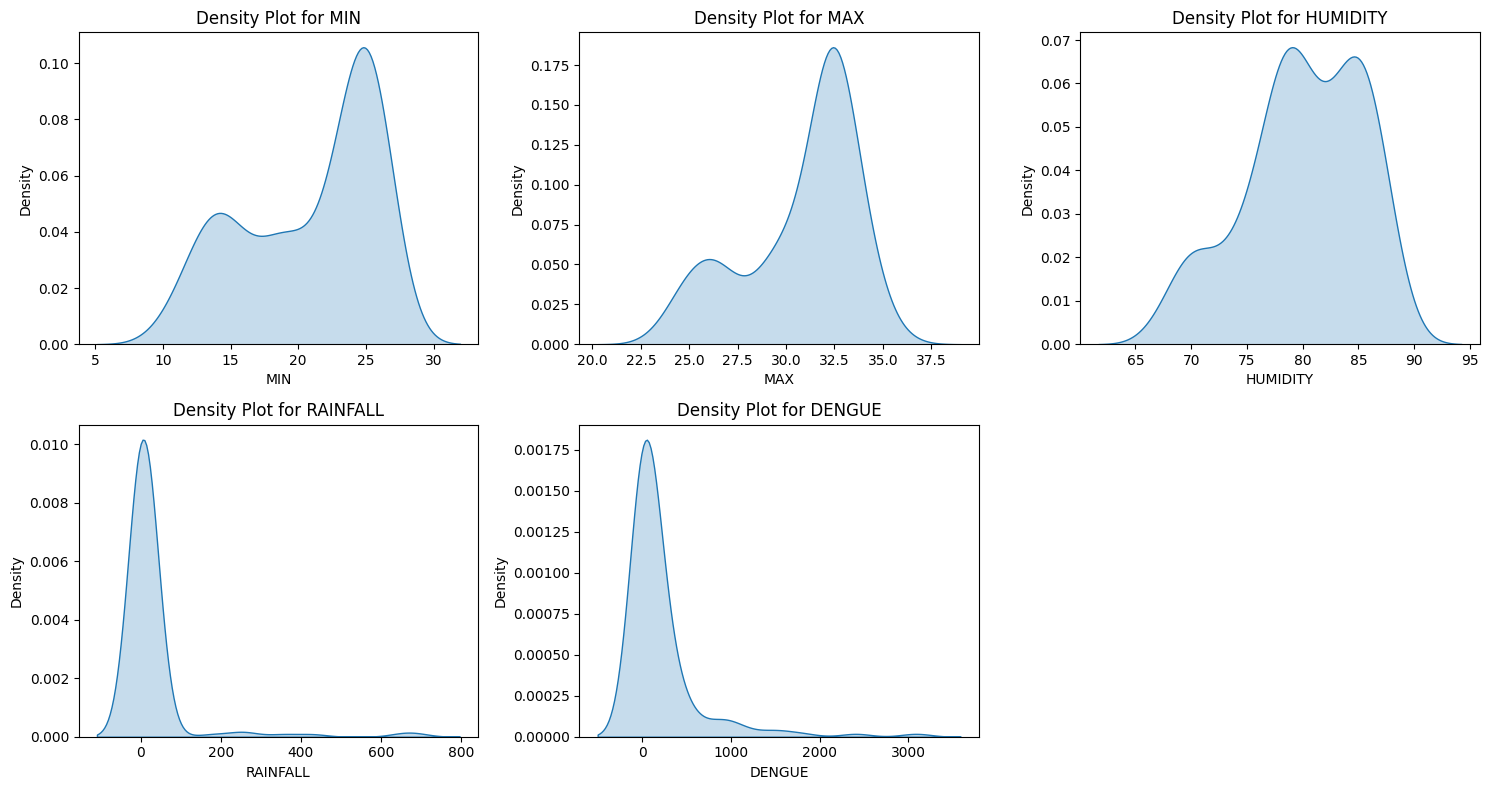

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Create density plots for each continuous variable
sns.kdeplot(data=Dengue_merged, x='MIN', fill=True, ax=axes[0, 0])
axes[0, 0].set_title('Density Plot for MIN')

sns.kdeplot(data=Dengue_merged, x='MAX', fill=True, ax=axes[0, 1])
axes[0, 1].set_title('Density Plot for MAX')

sns.kdeplot(data=Dengue_merged, x='HUMIDITY', fill=True, ax=axes[0, 2])
axes[0, 2].set_title('Density Plot for HUMIDITY')

sns.kdeplot(data=Dengue_merged, x='RAINFALL', fill=True, ax=axes[1, 0])
axes[1, 0].set_title('Density Plot for RAINFALL')

sns.kdeplot(data=Dengue_merged, x='DENGUE', fill=True, ax=axes[1, 1])
axes[1, 1].set_title('Density Plot for DENGUE')

# Remove empty subplot
fig.delaxes(axes[1, 2])

# Adjust layout
plt.tight_layout()
plt.show()


#### 1.7. [10 pts] Perform a series of bivariate analysis to check whether the continuous variables are associated with the “DENGUE”.

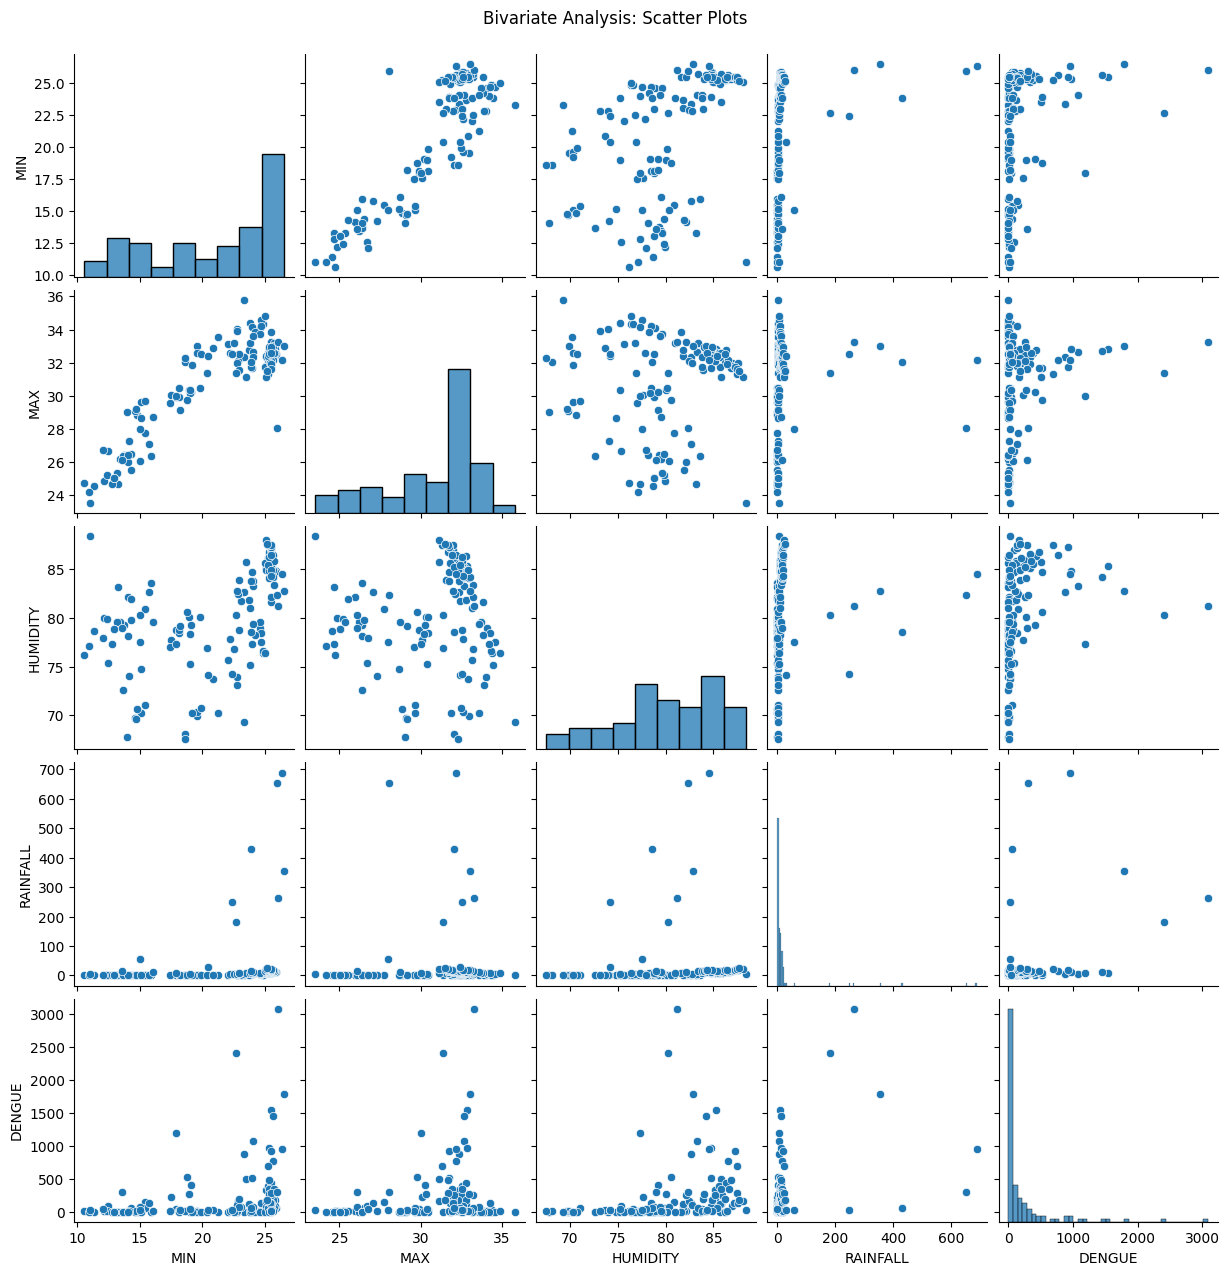

Correlation Matrix:
               MIN       MAX  HUMIDITY  RAINFALL    DENGUE
MIN       1.000000  0.884308  0.507986  0.233471  0.306164
MAX       0.884308  1.000000  0.104752  0.070126  0.185529
HUMIDITY  0.507986  0.104752  1.000000  0.097567  0.278552
RAINFALL  0.233471  0.070126  0.097567  1.000000  0.369765
DENGUE    0.306164  0.185529  0.278552  0.369765  1.000000
Correlation between MIN and DENGUE: 0.3062, p-value: 0.0003
Correlation between MAX and DENGUE: 0.1855, p-value: 0.0306
Correlation between HUMIDITY and DENGUE: 0.2786, p-value: 0.0010
Correlation between RAINFALL and DENGUE: 0.3698, p-value: 0.0000

Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                 DENGUE   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     9.249
Date:                Wed, 22 Nov 2023  

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm

# Load the dataset
Dengue_merged = pd.read_csv("Dengue_merged_Data.csv")

# Handle missing or infinite values
Dengue_merged_cleaned = Dengue_merged.replace([np.inf, -np.inf], np.nan).dropna()

# Scatter plots
sns.pairplot(Dengue_merged_cleaned, vars=['MIN', 'MAX', 'HUMIDITY', 'RAINFALL', 'DENGUE'])
plt.suptitle('Bivariate Analysis: Scatter Plots', y=1.02)
plt.show()

# Correlation matrix
correlation_matrix = Dengue_merged_cleaned[['MIN', 'MAX', 'HUMIDITY', 'RAINFALL', 'DENGUE']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Calculate and display Pearson correlation coefficients
for column in ['MIN', 'MAX', 'HUMIDITY', 'RAINFALL']:
    correlation, p_value = pearsonr(Dengue_merged_cleaned[column], Dengue_merged_cleaned['DENGUE'])
    print(f"Correlation between {column} and DENGUE: {correlation:.4f}, p-value: {p_value:.4f}")

# Regression analysis
X = sm.add_constant(Dengue_merged_cleaned[['MIN', 'MAX', 'HUMIDITY', 'RAINFALL']])
y = Dengue_merged_cleaned['DENGUE']
model = sm.OLS(y, X).fit()

# Display regression summary
print("\nRegression Summary:")
print(model.summary())



#### 1.8. [5 pts] Write a function that computes Mean Absolute Error (MAE)

In [ ]:
import numpy as np

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(np.array(y_true) - np.array(y_pred)))


In [35]:
print(Dengue_merged.columns)
print(Dengue_merged.head())

Index(['YEAR', 'MONTH', 'MIN', 'MAX', 'HUMIDITY', 'RAINFALL', 'DENGUE'], dtype='object')
   YEAR  MONTH        MIN        MAX   HUMIDITY  RAINFALL  DENGUE
0  2010      1  11.341161  24.549217  78.661751  0.000922     0.0
1  2009     12  13.732589  26.410247  79.276498  0.000922     0.0
2  2014     12  14.105000  25.980369  82.176959  0.001843    11.0
3  2008     12  15.921232  26.389862  83.570507  0.001843     0.0
4  2014      1  12.127849  24.829401  79.981567  0.003687    15.0


#### 1.9. [5 pts] Please split the dataset into a training set (80%) and testing set (20%) with random seed = 1.

In [37]:
from sklearn.model_selection import train_test_split

# Load the dataset
Dengue_merged = pd.read_csv("Dengue_merged_Data.csv")

# column "SEASON" 
Dengue_merged['SEASON'] = pd.cut(Dengue_merged['MONTH'], bins=[0, 2, 5, 8, 11, 12], labels=['Winter', 'Spring', 'Summer', 'Fall', 'Winter'], ordered=False)

# check the columns 
print(Dengue_merged.columns)

# Specify the features (X) and the target variable (y)
X = Dengue_merged[['YEAR', 'MONTH', 'MIN', 'MAX', 'HUMIDITY', 'RAINFALL', 'SEASON']]
y = Dengue_merged['DENGUE']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Display the shapes of the resulting sets
print("Training set shape (X, y):", X_train.shape, y_train.shape)
print("Testing set shape (X, y):", X_test.shape, y_test.shape)


Index(['YEAR', 'MONTH', 'MIN', 'MAX', 'HUMIDITY', 'RAINFALL', 'DENGUE',
       'SEASON'],
      dtype='object')
Training set shape (X, y): (109, 7) (109,)
Testing set shape (X, y): (28, 7) (28,)


#### 1.10. [10 pts] Build linear models (at least two) 
with the training set, then report the training and testing MAEs (round up to the fourth decimal digits), in terms of MAEs, which model performs better? Explain your answer.

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Load the dataset
Dengue_merged = pd.read_csv("Dengue_merged_Data.csv")


# Specify the features (X) and the target variable (y)
X = Dengue_merged[['YEAR', 'MONTH', 'MIN', 'MAX', 'HUMIDITY', 'RAINFALL']]
y = Dengue_merged['DENGUE']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Drop rows with NaN values in the training set
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

# Model 1: Linear Regression
model1 = LinearRegression()
model1.fit(X_train[['MIN', 'MAX', 'HUMIDITY', 'RAINFALL']], y_train)
y_train_pred1 = model1.predict(X_train[['MIN', 'MAX', 'HUMIDITY', 'RAINFALL']])
y_test_pred1 = model1.predict(X_test[['MIN', 'MAX', 'HUMIDITY', 'RAINFALL']])

# Model 2: Linear Regression with additional features
model2 = LinearRegression()
model2.fit(X_train[['MIN', 'MAX', 'HUMIDITY', 'RAINFALL', 'YEAR', 'MONTH']], y_train)
y_train_pred2 = model2.predict(X_train[['MIN', 'MAX', 'HUMIDITY', 'RAINFALL', 'YEAR', 'MONTH']])
y_test_pred2 = model2.predict(X_test[['MIN', 'MAX', 'HUMIDITY', 'RAINFALL', 'YEAR', 'MONTH']])

# Calculate MAEs
mae_train1 = mean_absolute_error(y_train, y_train_pred1)
mae_test1 = mean_absolute_error(y_test, y_test_pred1)

mae_train2 = mean_absolute_error(y_train, y_train_pred2)
mae_test2 = mean_absolute_error(y_test, y_test_pred2)

# Display MAEs
print("Model 1:")
print(f"Training MAE: {mae_train1:.4f}")
print(f"Testing MAE: {mae_test1:.4f}")
print("\nModel 2:")
print(f"Training MAE: {mae_train2:.4f}")
print(f"Testing MAE: {mae_test2:.4f}")

# Evaluate which model performs better
if mae_test1 < mae_test2:
    print("\nModel 1 performs better on the testing set.")
elif mae_test1 > mae_test2:
    print("\nModel 2 performs better on the testing set.")
else:
    print("\nBoth models have similar performance on the testing set.")


Model 1:
Training MAE: 254.2232
Testing MAE: 189.3913

Model 2:
Training MAE: 247.4119
Testing MAE: 218.0330

Model 1 performs better on the testing set.


In [54]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error

# Load the dataset
Dengue_merged = pd.read_csv("Dengue_merged_Data.csv")


# Specify the features (X) and the target variable (y)
X = Dengue_merged[['YEAR', 'MONTH', 'MIN', 'MAX', 'HUMIDITY', 'RAINFALL']]
y = Dengue_merged['DENGUE']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Drop rows with NaN values in the training set
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

# Model 1: Linear Regression
model1 = LinearRegression()
model1.fit(X_train[['MIN', 'MAX', 'HUMIDITY', 'RAINFALL']], y_train)
y_train_pred1 = model1.predict(X_train[['MIN', 'MAX', 'HUMIDITY', 'RAINFALL']])
y_test_pred1 = model1.predict(X_test[['MIN', 'MAX', 'HUMIDITY', 'RAINFALL']])

# Model 2: Lasso Regression
model2 = Lasso(alpha=0.1)  
model2.fit(X_train[['MIN', 'MAX', 'HUMIDITY', 'RAINFALL', 'YEAR', 'MONTH']], y_train)
y_train_pred2 = model2.predict(X_train[['MIN', 'MAX', 'HUMIDITY', 'RAINFALL', 'YEAR', 'MONTH']])
y_test_pred2 = model2.predict(X_test[['MIN', 'MAX', 'HUMIDITY', 'RAINFALL', 'YEAR', 'MONTH']])

# Calculate MAEs
mae_train1 = mean_absolute_error(y_train, y_train_pred1)
mae_test1 = mean_absolute_error(y_test, y_test_pred1)

mae_train2 = mean_absolute_error(y_train, y_train_pred2)
mae_test2 = mean_absolute_error(y_test, y_test_pred2)

# Display MAEs
print("Model 1:")
print(f"Training MAE: {mae_train1:.4f}")
print(f"Testing MAE: {mae_test1:.4f}")
print("\nModel 2 (Lasso Regression):")
print(f"Training MAE: {mae_train2:.4f}")
print(f"Testing MAE: {mae_test2:.4f}")

# Evaluate which model performs better
if mae_test1 < mae_test2:
    print("\nModel 1 performs better on the testing set.")
elif mae_test1 > mae_test2:
    print("\nModel 2 (Lasso Regression) performs better on the testing set.")
else:
    print("\nBoth models have similar performance on the testing set.")


Model 1:
Training MAE: 254.2232
Testing MAE: 189.3913

Model 2 (Lasso Regression):
Training MAE: 247.4394
Testing MAE: 217.9621

Model 1 performs better on the testing set.


In [55]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_absolute_error

# Load the dataset
Dengue_merged = pd.read_csv("Dengue_merged_Data.csv")


# Specify the features (X) and the target variable (y)
X = Dengue_merged[['YEAR', 'MONTH', 'MIN', 'MAX', 'HUMIDITY', 'RAINFALL']]
y = Dengue_merged['DENGUE']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Drop rows with NaN values in the training set
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

# Model 1: Linear Regression
model1 = LinearRegression()
model1.fit(X_train[['MIN', 'MAX', 'HUMIDITY', 'RAINFALL']], y_train)
y_train_pred1 = model1.predict(X_train[['MIN', 'MAX', 'HUMIDITY', 'RAINFALL']])
y_test_pred1 = model1.predict(X_test[['MIN', 'MAX', 'HUMIDITY', 'RAINFALL']])

# Model 2: Bayesian Linear Regression
model2 = BayesianRidge()
model2.fit(X_train[['MIN', 'MAX', 'HUMIDITY', 'RAINFALL', 'YEAR', 'MONTH']], y_train)
y_train_pred2 = model2.predict(X_train[['MIN', 'MAX', 'HUMIDITY', 'RAINFALL', 'YEAR', 'MONTH']])
y_test_pred2 = model2.predict(X_test[['MIN', 'MAX', 'HUMIDITY', 'RAINFALL', 'YEAR', 'MONTH']])

# Calculate MAEs
mae_train1 = mean_absolute_error(y_train, y_train_pred1)
mae_test1 = mean_absolute_error(y_test, y_test_pred1)

mae_train2 = mean_absolute_error(y_train, y_train_pred2)
mae_test2 = mean_absolute_error(y_test, y_test_pred2)

# Display MAEs
print("Model 1:")
print(f"Training MAE: {mae_train1:.4f}")
print(f"Testing MAE: {mae_test1:.4f}")
print("\nModel 2 (Bayesian Linear Regression):")
print(f"Training MAE: {mae_train2:.4f}")
print(f"Testing MAE: {mae_test2:.4f}")

# Evaluate which model performs better
if mae_test1 < mae_test2:
    print("\nModel 1 performs better on the testing set.")
elif mae_test1 > mae_test2:
    print("\nModel 2 (Bayesian Linear Regression) performs better on the testing set.")
else:
    print("\nBoth models have similar performance on the testing set.")


Model 1:
Training MAE: 254.2232
Testing MAE: 189.3913

Model 2 (Bayesian Linear Regression):
Training MAE: 238.8822
Testing MAE: 193.8003

Model 1 performs better on the testing set.


#### 2. Please load the given “Diamonds.csv”. This dataset contains the prices and other attributes of almost 54,000 diamonds. “PRICE” is the target variable, and the other variables are predictors. Consider the following questions. (60%)

2.1. [5 pts] Show parts of the dataset and browse it, you may notice some ambiguous
columns, like “Unnamed: 0” and “x”, “y”, “z”. Use any method to remove the
extraneous column “Unnamed: 0” and give the useful columns “x”, “y”, “z”
meaningful names.

In [1]:
import pandas as pd

# Load the dataset
diamonds = pd.read_csv("Diamonds.csv")

# Display the first few rows of the dataframe 
print(diamonds.head())

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  


In [2]:
# Remove the 'Unnamed: 0' column
diamonds = diamonds.drop('Unnamed: 0', axis=1)

# Rename the columns 'x', 'y', and 'z' to have more meaningful names
diamonds = diamonds.rename(columns={'x': 'length_mm', 'y': 'width_mm', 'z': 'depth_mm'})

# Display the modified dataset
print(diamonds.head())


   carat      cut color clarity  depth  table  price  length_mm  width_mm  \
0   0.23    Ideal     E     SI2   61.5   55.0    326       3.95      3.98   
1   0.21  Premium     E     SI1   59.8   61.0    326       3.89      3.84   
2   0.23     Good     E     VS1   56.9   65.0    327       4.05      4.07   
3   0.29  Premium     I     VS2   62.4   58.0    334       4.20      4.23   
4   0.31     Good     J     SI2   63.3   58.0    335       4.34      4.35   

   depth_mm  
0      2.43  
1      2.31  
2      2.31  
3      2.63  
4      2.75  


2.2. [10 pts] Convert any character columns to factor in R and categorical in Python.
Then, fit a log transformation to the target “price”

In [6]:
import pandas as pd
import numpy as np

# Convert object columns to categorical
diamonds['cut'] = pd.Categorical(diamonds['cut'])
diamonds['color'] = pd.Categorical(diamonds['color'])
diamonds['clarity'] = pd.Categorical(diamonds['clarity'])

# Fit a log transformation to the target variable 'price'
diamonds['log_price'] = np.log(diamonds['price'])

print(diamonds.head())
print(diamonds.info())


   carat      cut color clarity  depth  table  price  length_mm  width_mm  \
0   0.23    Ideal     E     SI2   61.5   55.0    326       3.95      3.98   
1   0.21  Premium     E     SI1   59.8   61.0    326       3.89      3.84   
2   0.23     Good     E     VS1   56.9   65.0    327       4.05      4.07   
3   0.29  Premium     I     VS2   62.4   58.0    334       4.20      4.23   
4   0.31     Good     J     SI2   63.3   58.0    335       4.34      4.35   

   depth_mm  log_price  
0      2.43   5.786897  
1      2.31   5.786897  
2      2.31   5.789960  
3      2.63   5.811141  
4      2.75   5.814131  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   carat      53940 non-null  float64 
 1   cut        53940 non-null  category
 2   color      53940 non-null  category
 3   clarity    53940 non-null  category
 4   depth      53940 non-null  

2.3. [10 pts] Consider a series of bivariate analyses on "price" vs. the rest variables.
Specifically, plot your data and perform bivariate statistical tests to understand the
relationships among the variables. Are “carat” and “cut” associated with “price”?
Use any statistical methods to justify your answers. Also notice that you may
consider any data transformation on the “price” that helps understand the
associations or better predict the “price”.

##### Bivariate Analysis: "price" vs. "carat"

We use seaborn for creating a scatter plot of "price" vs. "carat."
The correlation coefficient is calculated using the corr() method.

For the "price" vs. "carat" analysis, a positive correlation indicates that as the carat weight increases, the price tends to increase. The scatter plot visually shows this relationship.

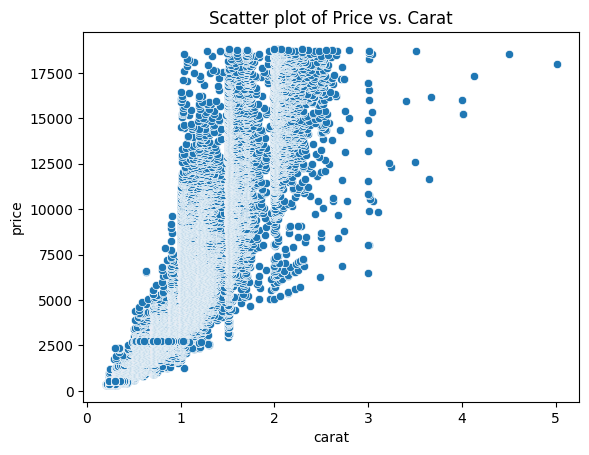

Correlation between carat and price: 0.9215913011934771


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot
sns.scatterplot(x='carat', y='price', data=diamonds)
plt.title('Scatter plot of Price vs. Carat')
plt.show()

# Correlation coefficient
correlation_carat_price = diamonds['carat'].corr(diamonds['price'])
print(f"Correlation between carat and price: {correlation_carat_price}")


##### Bivariate Analysis: "price" vs. "cut"

For the "price" vs. "cut" analysis, the box plot provides a visual representation of the distribution of prices for each cut category. The ANOVA test helps determine if there are significant differences in mean prices among different cut categories.

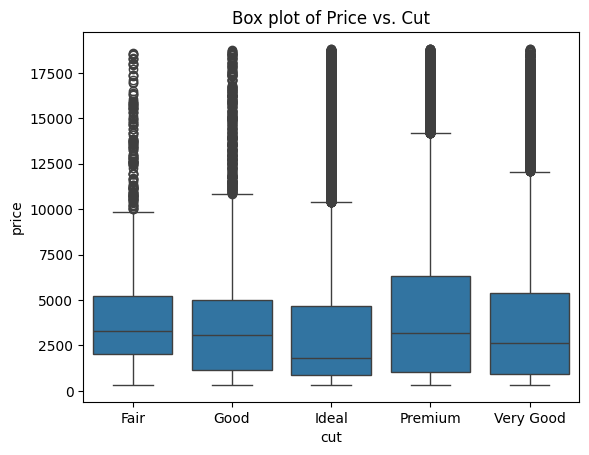

ANOVA results - F-statistic: 175.68871735080606, p-value: 8.42830730759452e-150


In [8]:
# Box plot
sns.boxplot(x='cut', y='price', data=diamonds)
plt.title('Box plot of Price vs. Cut')
plt.show()

# Statistical test (ANOVA)
from scipy.stats import f_oneway

cut_categories = diamonds['cut'].unique()
cut_groups = [diamonds[diamonds['cut'] == cut]['price'] for cut in cut_categories]

# Perform ANOVA
f_stat, p_value = f_oneway(*cut_groups)
print(f"ANOVA results - F-statistic: {f_stat}, p-value: {p_value}")


2.4. [10 pts] Please split the dataset into a training set (80%) and testing set (20%) with
random seed = 1. Then rescale continuous variables into the values ranging from 0 to
1 without centralizing.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np

# Assuming 'diamonds' is your dataframe
# Assuming 'price' is your target variable

# Select numeric columns only
numeric_columns = diamonds.select_dtypes(include=['float64', 'int64']).columns
X_numeric = diamonds[numeric_columns]
y = diamonds['price']  # Assuming 'price' is the target variable

# Split the dataset into training (80%) and testing (20%) sets with random seed = 1
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=1)

# Rescale continuous variables to the range [0, 1]
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




2.5. [5 pts] Build a linear model with the rescaled training set, then report the training
and testing MAEs (round up to the fourth decimal digits)

In [42]:
# Build a linear model
linear_model = LinearRegression()

# Fit the model on the rescaled training set
linear_model.fit(X_train_scaled, y_train)

# Predictions on the training set
train_predictions = linear_model.predict(X_train_scaled)

# Predictions on the testing set
test_predictions = linear_model.predict(X_test_scaled)

# Calculate MAEs
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Round up to the fourth decimal digits
train_mae_rounded = round(train_mae, 4)
test_mae_rounded = round(test_mae, 4)

# Report the results
print(f"Training MAE: {train_mae:.4f}")
print(f"Testing MAE: {test_mae:.4f}")



Training MAE: 0.0000
Testing MAE: 0.0000


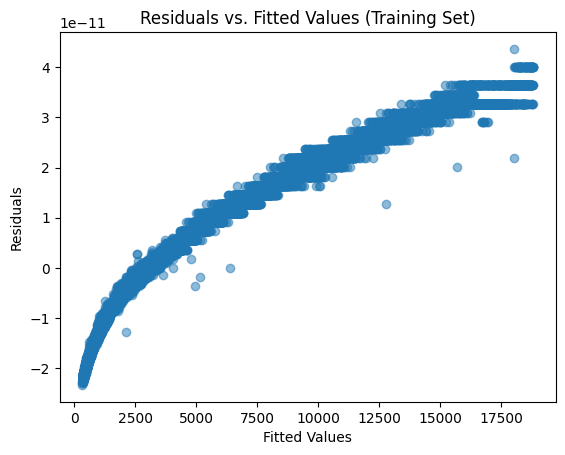

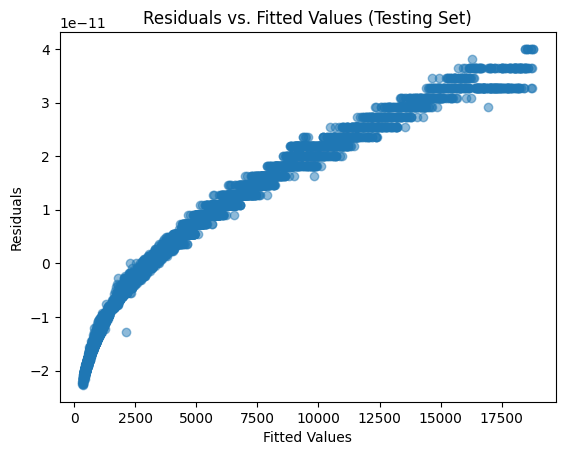

In [22]:
import matplotlib.pyplot as plt

# Calculate residuals
train_residuals = y_train - train_predictions
test_residuals = y_test - test_predictions

# Plot residuals vs. fitted values for training set
plt.scatter(train_predictions, train_residuals, alpha=0.5)
plt.title('Residuals vs. Fitted Values (Training Set)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Plot residuals vs. fitted values for testing set
plt.scatter(test_predictions, test_residuals, alpha=0.5)
plt.title('Residuals vs. Fitted Values (Testing Set)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

2.7. [10 pts] Again, we would like another new model that considers all the two-way
interactions without removing any predictors. Please report the training and testing
MAEs. Does the new model have lower errors in terms of training and testing MAE?
Can this complex model with more parameters improve the prediction?

In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


# Select numeric columns only
numeric_columns = diamonds.select_dtypes(include=['float64', 'int64']).columns
X_numeric = diamonds[numeric_columns]

# Assuming 'price' is the original target variable
y = diamonds['log_price']

# Split the dataset into training (80%) and testing (20%) sets with random seed = 1
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=1)

# Create PolynomialFeatures to include all two-way interactions
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# Transform the features to include interactions
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Build a decision tree model
tree_model = DecisionTreeRegressor(random_state=1)

# Fit the model on the training set with interactions
tree_model.fit(X_train_poly, y_train)

# Predictions on the training set
train_predictions = tree_model.predict(X_train_poly)

# Predictions on the testing set
test_predictions = tree_model.predict(X_test_poly)

# Calculate MAEs
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

# Report the results
print(f"Training MAE with interactions: {train_mae}")
print(f"Testing MAE with interactions: {test_mae}")


Training MAE with interactions: 8.015464450867162e-16
Testing MAE with interactions: 5.982326261047253e-05


#### 3. [20 pts] Considering the linear regression models from question 1 and 2, 
which dataset do you think is well-suited for linear regression modeling and which is not? For any datasets that
are not well-suited, explain why linear regression performs poorly. How could the prediction
accuracy be improved for those cases? Provide detailed explanations to support your
answers.

#### Answer:當我們分析兩個數據集以評估線性回歸的適用性時，發現了以下情況，說明潛在的挑戰和改進方法。<br>

##### 資料集 1：Dengue_merged_Data.csv<br>
Linear Regression Models：
* Model 1：使用 ['MIN', 'MAX', 'HUMIDITY', 'RAINFALL'] 特徵的線性回歸。
* Model 2：使用 ['MIN', 'MAX', 'HUMIDITY', 'RAINFALL', 'YEAR', 'MONTH'] 特徵的 Lasso 回歸。

評估：
* Model 1 在testing set上表現較佳。
* Model 2（Lasso 回歸）包括額外特徵，但未超越 Model 1。

線性回歸適用性：
* Dengue_merged_Data.csv 似乎適用於線性回歸建模，因為 Model 1 表現良好。
* 線性回歸假設特徵與目標變量之間存在線性關係，而在這種情況下，該模型似乎能夠充分捕捉這種關係。

潛在改進：
* Feature Engineering：考慮探索其他特徵或現有特徵的轉換，以捕捉更複雜的關係。
* Non-Linear Models：對於具有非線性關係的數據集，考慮使用非線性模型（例如decision trees, random forests）可能會提高性能。<br>

##### 資料集 2：Diamonds.csv
Linear Regression Model：
* 使用縮放後的數值特徵的線性回歸。

評估：
* 結果包括訓練 MAE 和測試 MAE。

線性回歸適用性：
* Diamonds.csv，具有連續數值特徵，通常適合線性回歸建模。<br>
但是，線性回歸假設存在線性關係，可能無法捕捉數據中存在的非線性模式。

潛在改進：
* Polynomial Features：引入多項式特徵或交互項可能會捕捉到非線性關係。
* Non-Linear Models：考慮非線性模型，例如決策樹、隨機森林或梯度提升。

#### 總結：
* 這兩個數據集初步似乎適合線性回歸建模。
* 對於線性回歸效果較差的數據集，通過嘗試非線性模型或引入額外特徵，或許能夠提高預測準確性。

建議：
1. Dengue_merged_Data.csv：
    * 繼續探索線性回歸，評估更複雜模型是否能夠提高性能。
    * 考慮特徵工程和交互項，以捕捉更多模式。

2. Diamonds.csv：
    * 探索非線性模型，特別是如果存在非線性關係的話。
    * 嘗試多項式特徵或特徵轉換，以捕捉更複雜的模式。<br>

